In [19]:
import re
import matplotlib.pyplot as plt

def plot_training_logs(path: str, titulo: str = "Arquitectura 784-32-10"):
    # Listas para guardar los valores
    train_loss, test_loss = [], []
    train_acc, test_acc = [], []

    # Expresión regular para extraer los valores
    pattern = re.compile(
        r"Epoch (\d+), Train Loss: ([\d.]+), Train Accuracy: ([\d.]+)%, Test Loss: ([\d.]+), Test Accuracy: ([\d.]+)%"
    )

    # Leer el archivo y extraer los valores
    with open(path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                train_loss.append(float(match.group(2)))
                train_acc.append(float(match.group(3)))
                test_loss.append(float(match.group(4)))
                test_acc.append(float(match.group(5)))

    # Crear los gráficos
    epochs = list(range(1, len(train_loss) + 1))

    # Gráfico de Loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train Loss', color='blue')
    plt.plot(epochs, test_loss, label='Test Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Train vs Test Loss / {titulo}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Gráfico de Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_acc, label='Train Accuracy', color='green')
    plt.plot(epochs, test_acc, label='Test Accuracy', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Train vs Test Accuracy / {titulo}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Buscar el mejor accuracy en train
    best_epoch = test_acc.index(max(test_acc))
    print(f"\n📌 Mejor Tess Accuracy en Epoch {best_epoch + 1}:")
    print(f"  - Train Loss     : {train_loss[best_epoch]:.4f}")
    print(f"  - Train Accuracy : {train_acc[best_epoch]:.2f}%")
    print(f"  - Test Loss      : {test_loss[best_epoch]:.4f}")
    print(f"  - Test Accuracy  : {test_acc[best_epoch]:.2f}%")


### arch784x64x32x10
```cpp
float learning_rate = 0.001f;
float wd = 0;

Optimizer *adam = new Adam(learning_rate, 0);
MLP mlp(learning_rate, adam);

mlp.add_layer(new DenseLayer(784, 64, new ReLU(), adam));
mlp.add_layer(new DenseLayer(64, 32, new ReLU(), adam));
mlp.add_layer(new DenseLayer(32, 10, new Softmax(), adam));
mlp.set_loss(new CrossEntropyLoss());
```

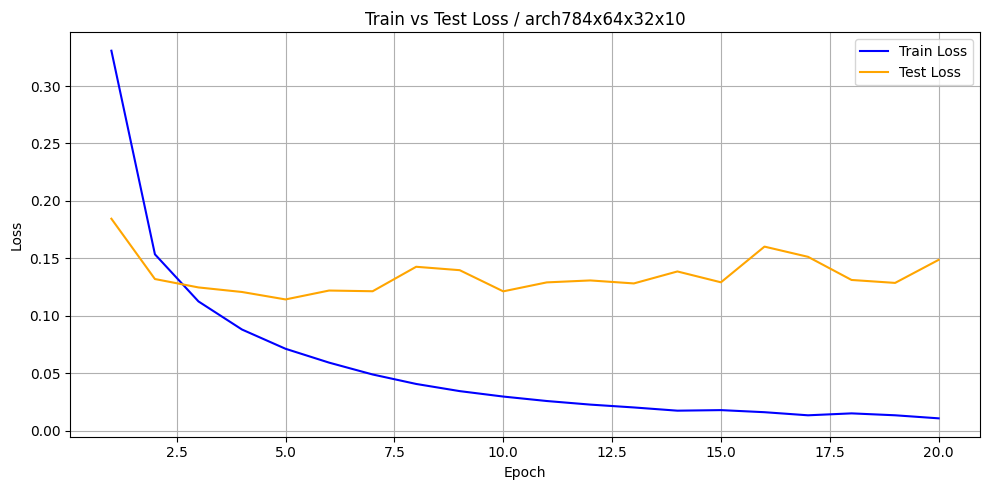

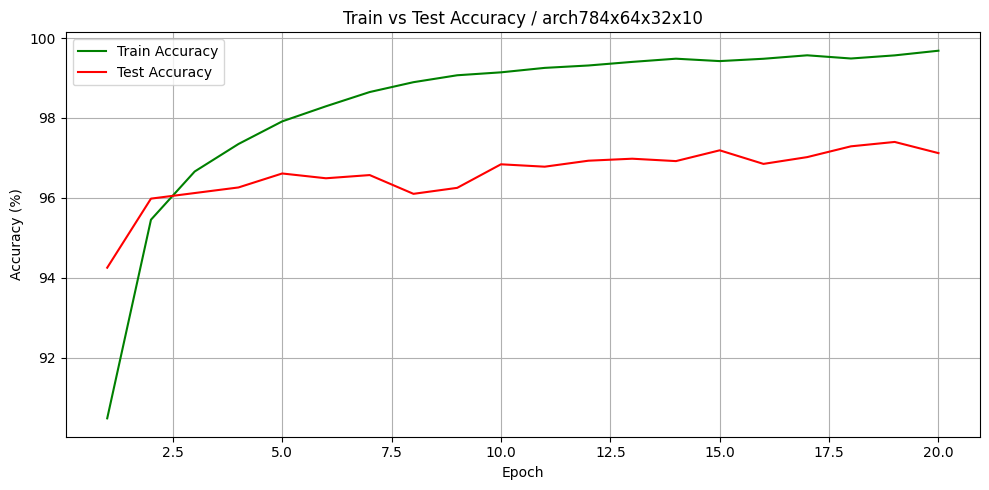


📌 Mejor Tess Accuracy en Epoch 19:
  - Train Loss     : 0.0133
  - Train Accuracy : 99.57%
  - Test Loss      : 0.1286
  - Test Accuracy  : 97.40%


In [20]:
plot_training_logs("output/arch784x64x32x10.txt", "arch784x64x32x10")

### drop02-arch784x64x32x10
```cpp
float learning_rate = 0.001f;
float wd = 0f;

Optimizer *adam = new Adam(learning_rate, wd);
MLP mlp(learning_rate, adam);

mlp.add_layer(new DenseLayer(784, 64, new ReLU(), adam));
mlp.add_layer(new DropoutLayer(0.2));
mlp.add_layer(new DenseLayer(64, 32, new ReLU(), adam));
mlp.add_layer(new DropoutLayer(0.2));
mlp.add_layer(new DenseLayer(32, 10, new Softmax(), adam));
mlp.set_loss(new CrossEntropyLoss());
```

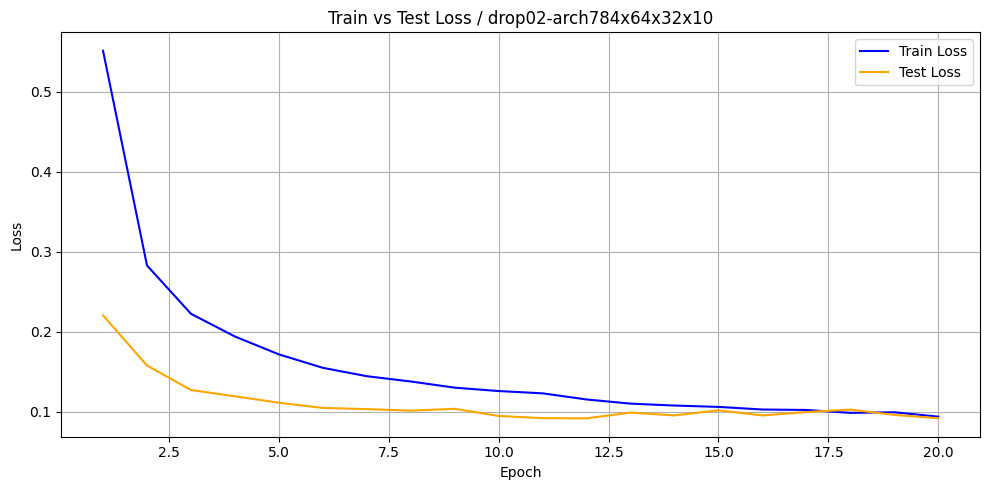

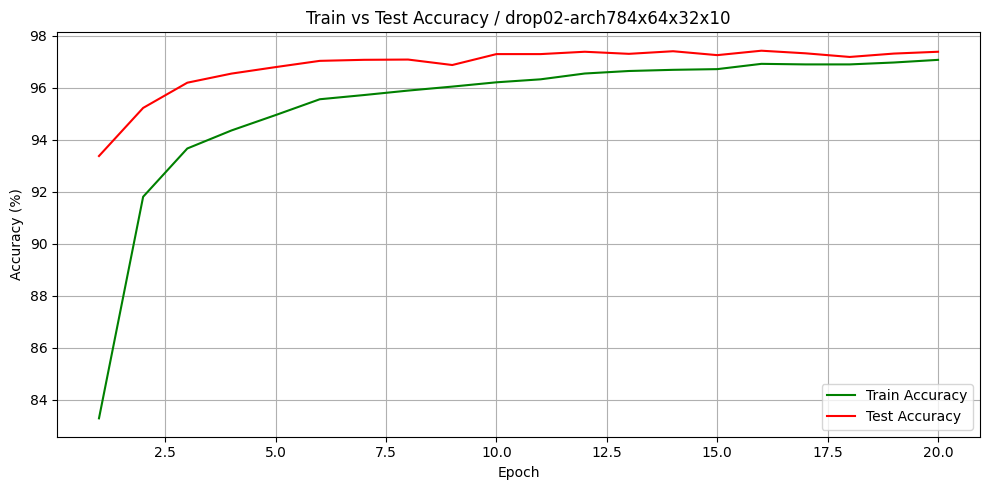


📌 Mejor Tess Accuracy en Epoch 16:
  - Train Loss     : 0.1026
  - Train Accuracy : 96.92%
  - Test Loss      : 0.0952
  - Test Accuracy  : 97.43%


In [21]:
plot_training_logs("output/drop02-arch784x64x32x10.txt", "drop02-arch784x64x32x10")

### wd-001-arch784x64x32x10
```cpp
float learning_rate = 0.001f;
float wd = 0.01f;

Optimizer *adam = new Adam(learning_rate, wd);
MLP mlp(learning_rate, adam);

mlp.add_layer(new DenseLayer(784, 64, new ReLU(), adam));
mlp.add_layer(new DenseLayer(64, 32, new ReLU(), adam));
mlp.add_layer(new DenseLayer(32, 10, new Softmax(), adam));
mlp.set_loss(new CrossEntropyLoss());
```

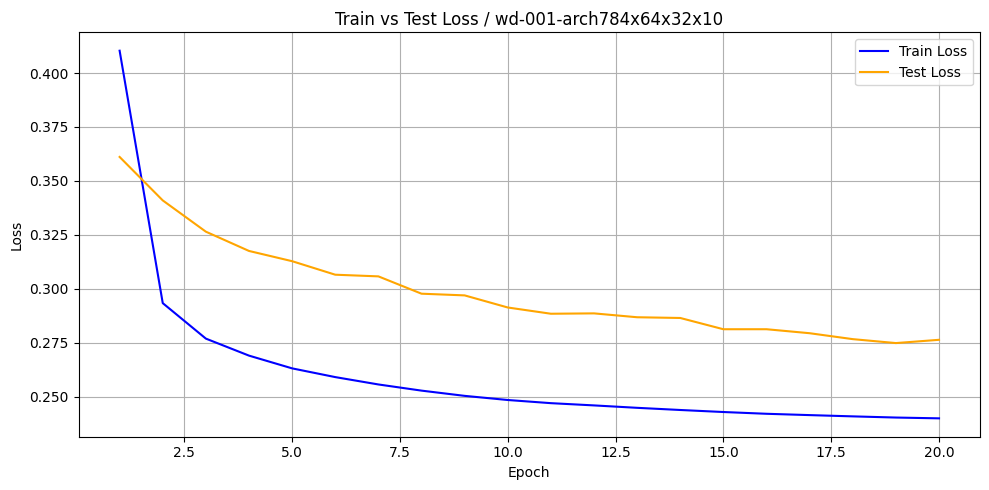

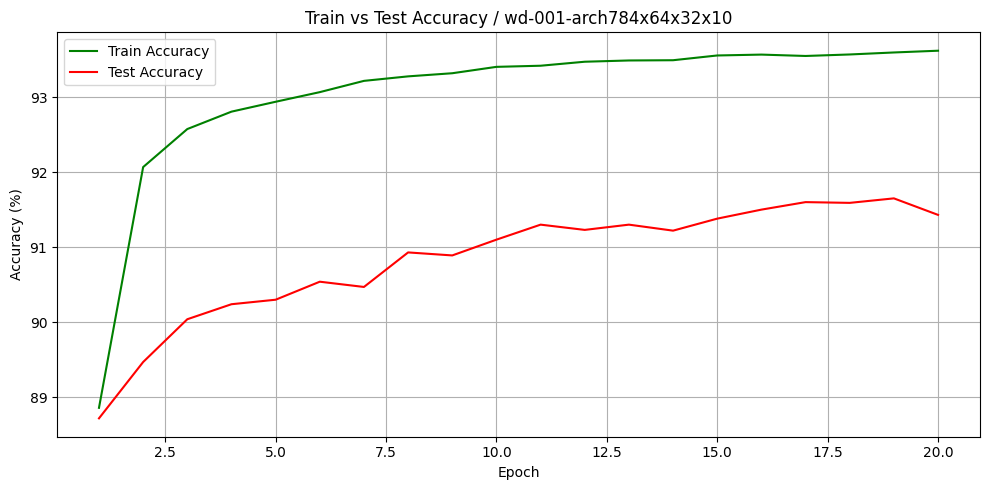


📌 Mejor Tess Accuracy en Epoch 19:
  - Train Loss     : 0.2403
  - Train Accuracy : 93.59%
  - Test Loss      : 0.2748
  - Test Accuracy  : 91.65%


In [22]:
plot_training_logs("output/wd-001-arch784x64x32x10.txt", "wd-001-arch784x64x32x10")

### drop02-wd-001-arch784x64x32x10
```cpp
float learning_rate = 0.001f;
float wd = 0.01;

Optimizer *adam = new Adam(learning_rate, wd);
MLP mlp(learning_rate, adam);

mlp.add_layer(new DenseLayer(784, 64, new ReLU(), adam));
mlp.add_layer(new DropoutLayer(0.2));
mlp.add_layer(new DenseLayer(64, 32, new ReLU(), adam));
mlp.add_layer(new DropoutLayer(0.2));
mlp.add_layer(new DenseLayer(32, 10, new Softmax(), adam));
mlp.set_loss(new CrossEntropyLoss());
```

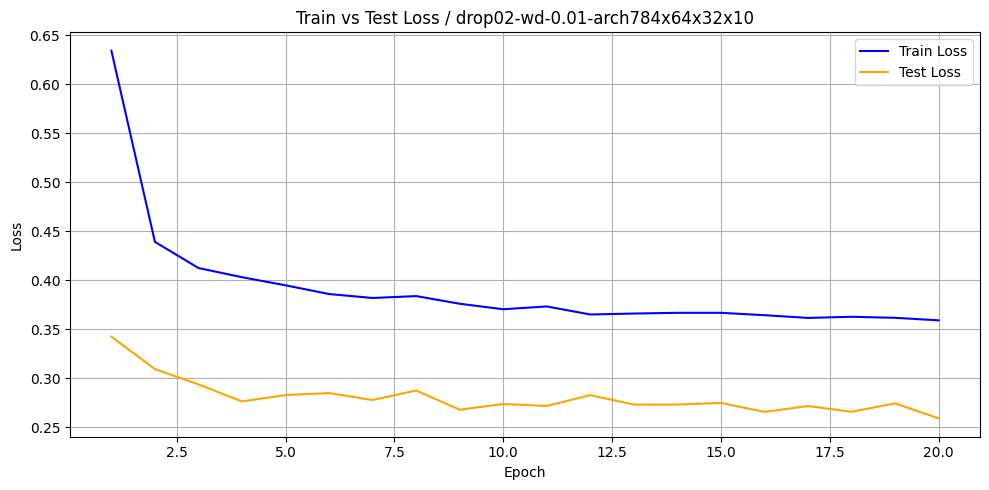

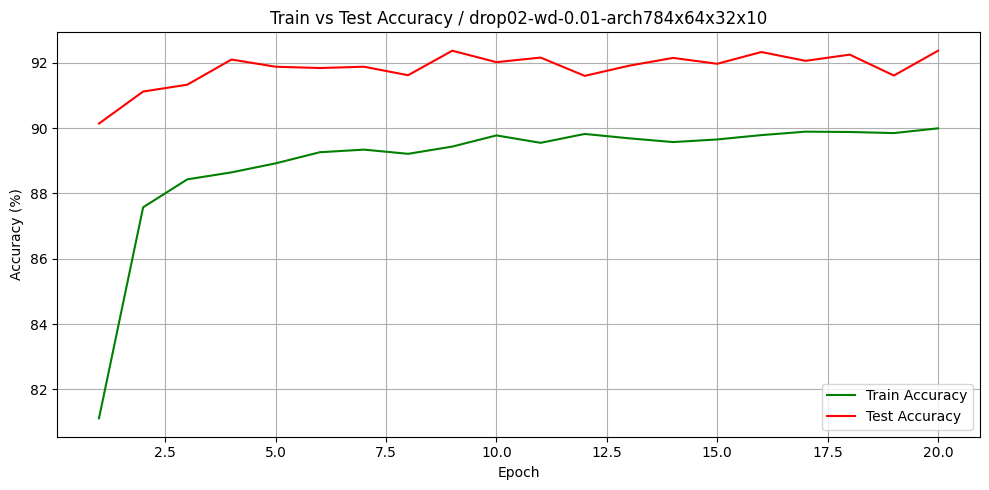


📌 Mejor Tess Accuracy en Epoch 9:
  - Train Loss     : 0.3758
  - Train Accuracy : 89.44%
  - Test Loss      : 0.2678
  - Test Accuracy  : 92.37%


In [23]:
plot_training_logs("output/drop02-wd-0.01-arch784x64x32x10.txt", "drop02-wd-0.01-arch784x64x32x10")

### drop02-wd-0005-arch784x64x32x10
```cpp
float learning_rate = 0.001f;
float wd = 0.01f;

Optimizer *adam = new Adam(learning_rate, wd);
MLP mlp(learning_rate, adam);

mlp.add_layer(new DenseLayer(784, 64, new ReLU(), adam));
mlp.add_layer(new DropoutLayer(0.2));
mlp.add_layer(new DenseLayer(64, 32, new ReLU(), adam));
mlp.add_layer(new DropoutLayer(0.2));
mlp.add_layer(new DenseLayer(32, 10, new Softmax(), adam));
mlp.set_loss(new CrossEntropyLoss());
```

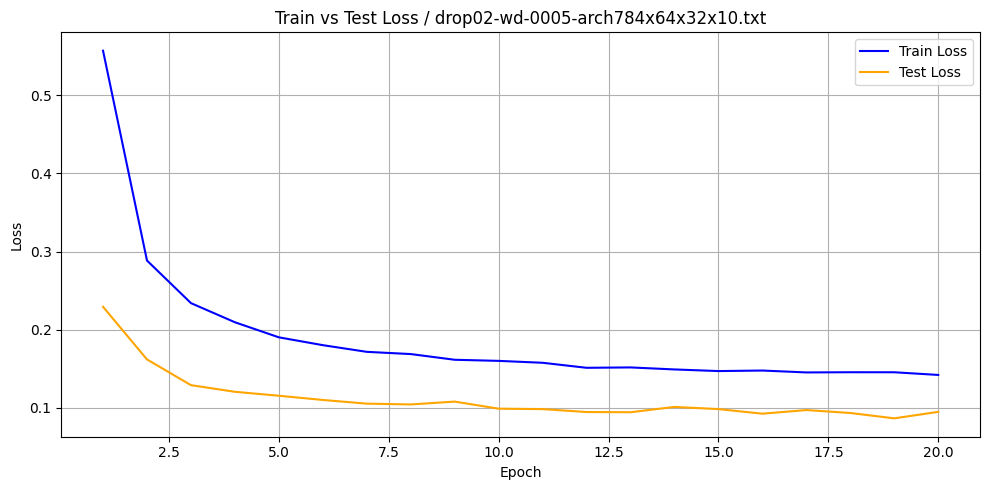

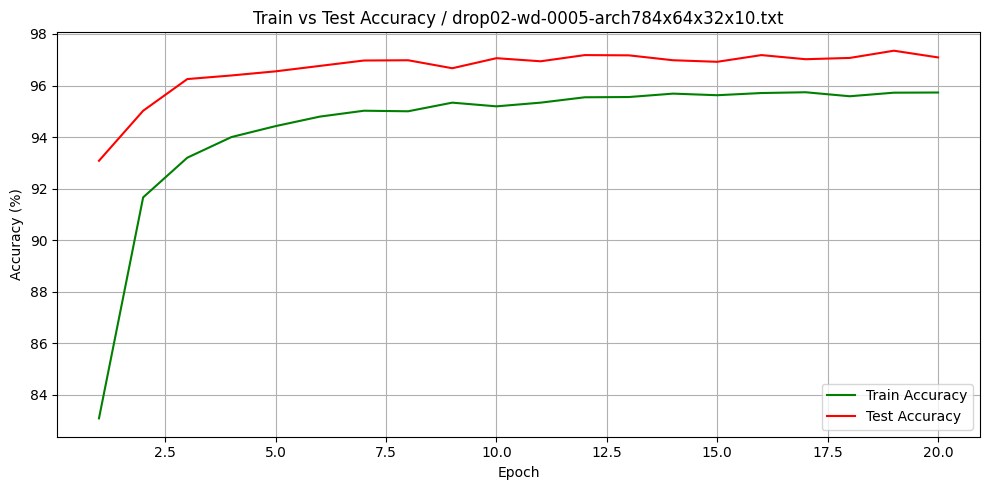


📌 Mejor Tess Accuracy en Epoch 19:
  - Train Loss     : 0.1456
  - Train Accuracy : 95.72%
  - Test Loss      : 0.0866
  - Test Accuracy  : 97.35%


In [24]:
plot_training_logs("output/drop02-wd-0005-arch784x64x32x10.txt", "drop02-wd-0005-arch784x64x32x10.txt")

Tiempo total de entrenamiento: 1411.1 segundos
Evaluation Results:
 - Test samples: 10000
 - Correct predictions: 9124
 - Accuracy: 91.24%

In [16]:
import os
import re
import matplotlib.pyplot as plt

def plot_all_logs_from_folder(folder_path: str):
    # Patrón para extraer los datos por epoch
    epoch_pattern = re.compile(
        r"Epoch (\d+), Train Loss: ([\d.]+), Train Accuracy: ([\d.]+)%, Test Loss: ([\d.]+), Test Accuracy: ([\d.]+)%"
    )
    # Patrón para eliminar cadenas tipo "784x64x32x10"
    architecture_pattern = re.compile(r"\d+(x\d+)+")

    test_losses = {}
    test_accuracies = {}

    # Leer cada archivo .txt
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            filepath = os.path.join(folder_path, filename)
            base_name = os.path.splitext(filename)[0]
            # Limpiar la arquitectura del nombre
            model_name = architecture_pattern.sub("", base_name).replace("__", "_").strip("_")

            with open(filepath, 'r') as file:
                content = file.read()

            losses, accs = [], []

            for match in epoch_pattern.finditer(content):
                test_loss = float(match.group(4))
                test_acc = float(match.group(5))
                losses.append(test_loss)
                accs.append(test_acc)

            test_losses[model_name] = losses
            test_accuracies[model_name] = accs

    # --- Gráfico 1: Test Loss ---
    plt.figure(figsize=(8, 5))
    for model, losses in test_losses.items():
        plt.plot(range(1, len(losses) + 1), losses, label=model)
    plt.title("Curva de Test Loss por Modelo")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Gráfico 2: Test Accuracy ---
    plt.figure(figsize=(8, 5))
    for model, accs in test_accuracies.items():
        plt.plot(range(1, len(accs) + 1), accs, label=model)
    plt.title("Curva de Test Accuracy por Modelo")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


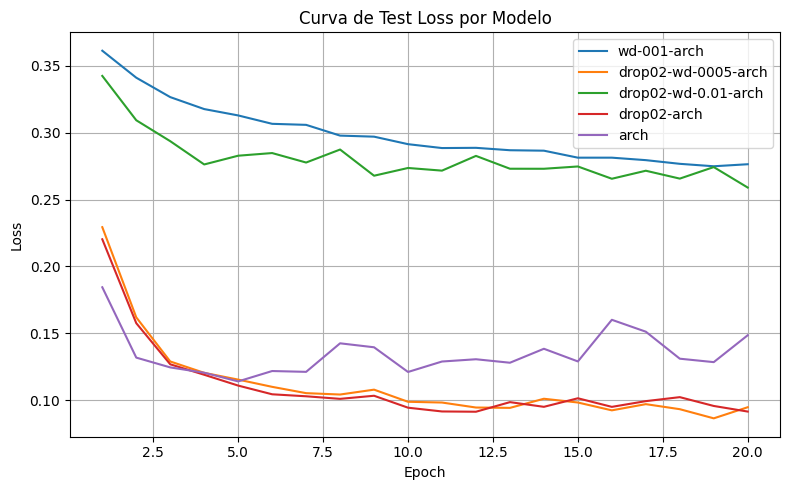

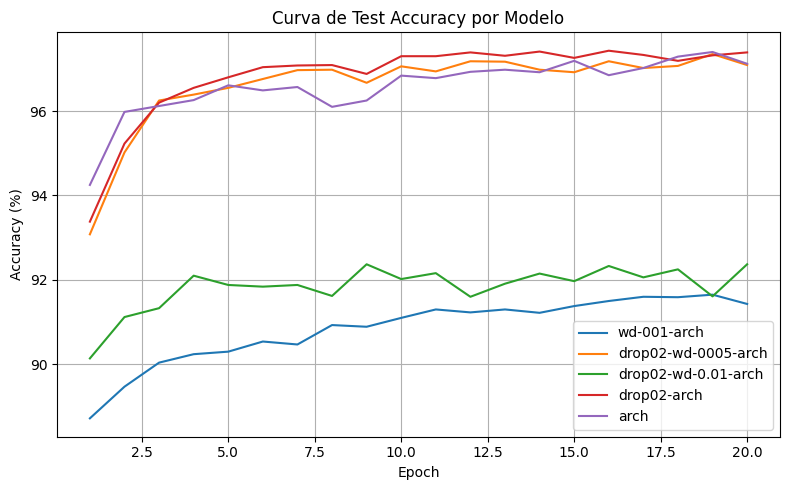

In [17]:
plot_all_logs_from_folder("output/")